In [105]:
# a.Import libraries
# https://docs.google.com/document/d/1KomuVZVqvBvOYNi8Jj7Pttsl1Vlvipy9COBCehb_oIU/edit?usp=sharing
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [126]:
# Load text file and convert to lowercase (only once)
with open("CBOW.txt", "r") as file:
    text = file.read().lower()

# Remove special characters and digits.
# This leaves only letters and whitespace.
cleaned_text = re.sub(r'[^a-z\s]', '', text)
print(cleaned_text)
# Tokenize text into words
tokens = cleaned_text.split()

print("Total tokens:", len(tokens))
print("Sample tokens:", tokens[:15])

# Create a vocabulary
vocab = sorted(set(tokens))
vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)

# Create mapping of word to index
# 1. Create empty dictionaries
word2idx = {}
idx2word = {}

# 2. Loop through the vocabulary, getting the index (i) and the word
#    enumerate(vocab) gives you pairs like (0, 'apple'), (1, 'banana'), ...
for i, word in enumerate(vocab): 
    # 3. For each word, add an entry to word2idx
    word2idx[word] = i
    # 4. Add the reverse entry to idx2word
    idx2word[i] = word

print(word2idx)
print(idx2word)

the speed of transmission is an important point of difference between the two viruses influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid virus the serial interval for covid virus is estimated to be  days while for influenza virus the serial interval is  days this means that influenza can spread faster than covid 

further transmission in the first  days of illness or potentially presymptomatic transmission transmission of the virus before the appearance of symptoms  is a major driver of transmission for influenza in contrast while we are learning that there are people who can shed covid virus  hours prior to symptom onset at present this does not appear to be a major driver of transmission 

the reproductive number  the number of secondary infections generated from one infected individual  is understood to be between  and  for covid virus higher than for influenza 

In [125]:
window_size = 2  # context window
data = []

# Create (context, target) pairs
for i in range(window_size, len(tokens) - window_size):
    context = [tokens[i - 2], tokens[i - 1], tokens[i + 1], tokens[i + 2]]
    target = tokens[i]
    data.append((context, target))

print("Total training pairs:", len(data))
print("Example pair:", data[100])

Total training pairs: 173
Example pair: (['in', 'contrast', 'we', 'are'], 'while')


In [103]:
# Prepare training data using word indices instead of one-hot
X = []  # context word indices
Y = []  # target word index

for context, target in data:
    # Convert words to indices
    context_indices = []
    for w in context:
        context_indices.append(word2idx[w])
    target_index = word2idx[target]
    X.append(context_indices)
    Y.append(target_index)

X = np.array(X)
Y = np.array(Y)
print(X)
print(Y)
print("Input shape:", X.shape)
print("Output shape:", Y.shape)


[[77 70 83 45]
 [70 54 45  1]
 [54 83  1 36]
 [83 45 36 60]
 [45  1 60 54]
 [ 1 36 54 18]
 [36 60 18  9]
 [60 54  9 77]
 [54 18 77 84]
 [18  9 84 88]
 [ 9 77 88 43]
 [77 84 43 31]
 [84 88 31  0]
 [88 43  0 69]
 [43 31 69 50]
 [31  0 50 38]
 [ 0 69 38 59]
 [69 50 59 77]
 [50 38 77 80]
 [38 59 80 28]
 [59 77 28 41]
 [77 80 41 82]
 [80 28 82  4]
 [28 41  4 54]
 [41 82 54 74]
 [82  4 74  2]
 [ 4 54  2  0]
 [54 74  0 69]
 [74  2 69 67]
 [ 2  0 67 44]
 [ 0 69 44 77]
 [69 67 77 80]
 [67 44 80  9]
 [44 77  9 72]
 [77 80 72 12]
 [80  9 12 75]
 [ 9 72 75 16]
 [72 12 16 87]
 [12 75 87 77]
 [75 16 77 67]
 [16 87 67 44]
 [87 77 44 27]
 [77 67 27 16]
 [67 44 16 87]
 [44 27 87 45]
 [27 16 45 23]
 [16 87 23 82]
 [87 45 82  7]
 [45 23  7 17]
 [23 82 17 90]
 [82  7 90 27]
 [ 7 17 27 43]
 [17 90 43 87]
 [90 27 87 77]
 [27 43 77 67]
 [43 87 67 44]
 [87 77 44 45]
 [77 67 45 17]
 [67 44 17 79]
 [44 45 79 49]
 [45 17 49 76]
 [17 79 76 43]
 [79 49 43 11]
 [49 76 11 71]
 [76 43 71 25]
 [43 11 25 75]
 [11 71 75

In [120]:
import tensorflow
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense

model = Sequential([
    Input(shape=(4,)),
    Embedding(input_dim=vocab_size, output_dim=32),
    GlobalAveragePooling1D(),
    Dense(vocab_size, activation="softmax")
])

model.compile(optimizer = Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X,Y,epochs=50, shuffle=True, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0347 - loss: 4.5174  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2601 - loss: 4.4323 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2832 - loss: 4.3300 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3064 - loss: 4.1972 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3295 - loss: 4.0151 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3468 - loss: 3.7848 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3642 - loss: 3.5276 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3873 - loss: 3.2505 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4046 - loss: 2.9887 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3988 - loss: 2.7312 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4451 - loss: 2.4807 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4798 - loss: 2.2376 


In [107]:
idx = random.randint(0, len(data) - 1)
test_context, actual_target = data[idx]
context_indices = np.array([[word2idx[w] for w in test_context]])

pred = model.predict(context_indices)
pred_word = idx2word[np.argmax(pred)]

print(f"\nContext words: {test_context}")
print("Actual target word:", actual_target)
print("Predicted target word:", pred_word)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[1.60675281e-05 1.28928863e-04 8.11114091e-07 8.46570128e-06
  2.05749002e-05 9.61156428e-01 6.22929633e-07 2.36361018e-07
  4.42042676e-07 3.38774298e-09 4.42497985e-08 1.71609409e-02
  5.54860158e-08 5.43928763e-05 1.34412244e-06 4.53712300e-06
  5.88340356e-07 5.09839140e-07 3.52532857e-06 2.24287510e-06
  2.02849606e-06 2.29105353e-05 2.23954586e-07 1.84002751e-08
  8.72604673e-08 4.32161823e-06 8.96292295e-06 1.00174638e-07
  4.34027925e-06 2.81949679e-06 2.41951966e-06 1.75778623e-05
  8.16635364e-08 3.54890602e-07 2.01520024e-07 4.64214463e-06
  7.92367064e-05 2.59263234e-05 2.09807640e-05 1.61346925e-05
  1.75035566e-05 1.04496132e-06 5.13237137e-06 1.08079776e-05
  7.64702872e-06 1.14901518e-07 9.97309852e-03 4.42653982e-05
  1.14668740e-06 6.11574214e-04 9.94724246e-07 1.76581159e-06
  3.24255393e-06 1.01853529e-05 3.44613682e-07 3.95576035e-06
  5.24468078e-06 3.74493320e-05 4.41750279e-03 7.49001674e-06
  6.58144108e-06 1.27832773e-05 

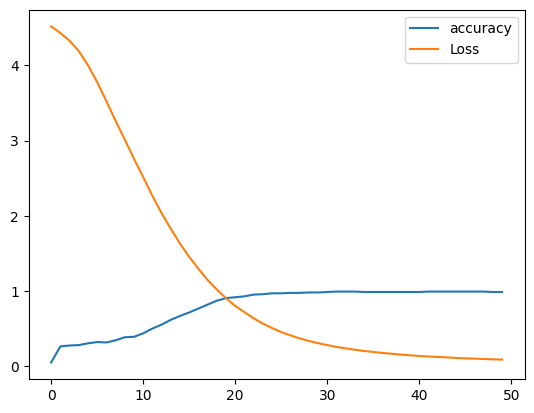

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['loss'], label="Loss")
plt.legend()
plt.show()
